In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [5]:
import yfinance as yf

aapl = yf.Ticker("AAPL")
df = aapl.history(start="2010-01-01", end="2023-12-31")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.453205,6.485557,6.421457,6.470741,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.488580,6.518514,6.447762,6.481928,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.481927,6.507627,6.372171,6.378823,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.402409,6.409968,6.320772,6.367033,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.358567,6.409968,6.321076,6.409363,447610800,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,194.931260,195.160978,192.724085,193.353287,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.363270,193.642911,192.584265,192.803986,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,192.244692,193.253399,190.846467,192.903839,48087700,0.0,0.0
2023-12-28 00:00:00-05:00,193.892582,194.411923,192.923817,193.333298,34049900,0.0,0.0
2023-12-29 00:00:00-05:00,193.652887,194.152249,191.485654,192.284637,42628800,0.0,0.0


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.453205,6.485557,6.421457,6.470741,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.488580,6.518514,6.447762,6.481928,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.481927,6.507627,6.372171,6.378823,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.402409,6.409968,6.320772,6.367033,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.358567,6.409968,6.321076,6.409363,447610800,0.0,0.0


In [8]:
df = df.drop(['Date','Dividends','Stock Splits'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.453205,6.485557,6.421457,6.470741,493729600
1,6.488580,6.518514,6.447762,6.481928,601904800
2,6.481927,6.507627,6.372171,6.378823,552160000
3,6.402409,6.409968,6.320772,6.367033,477131200
4,6.358567,6.409968,6.321076,6.409363,447610800


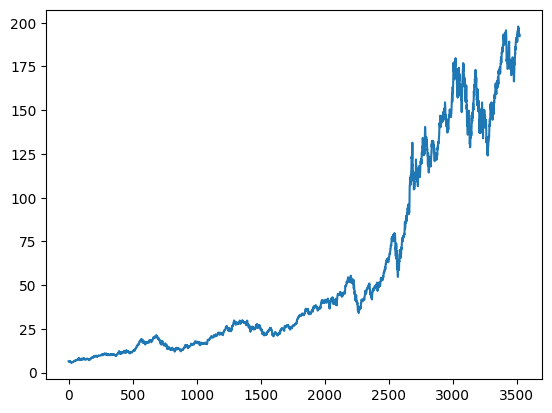

In [9]:
plt.plot(df['Close'])

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.358895
3518    181.382755
3519    181.499051
3520    181.650919
3521    181.782838
Name: Close, Length: 3522, dtype: float64

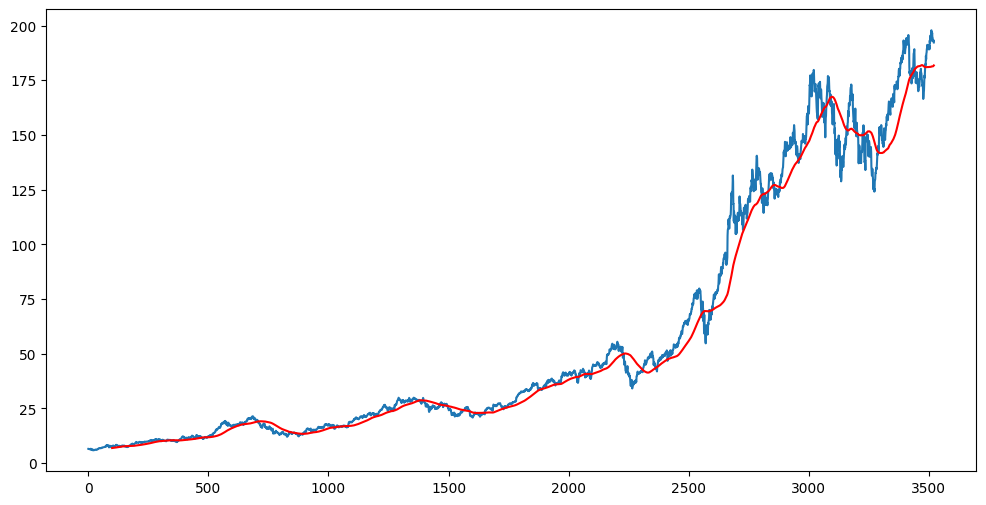

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.049736
3518    178.275198
3519    178.491362
3520    178.699129
3521    178.899664
Name: Close, Length: 3522, dtype: float64

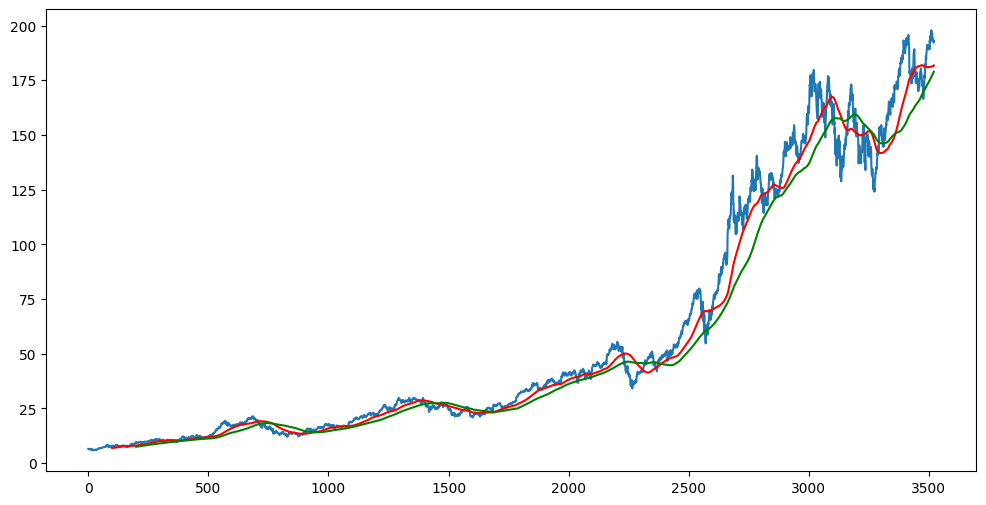

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3522, 5)

In [17]:
# Splitting data into training and testing
 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [18]:
data_training.head()

,Close
0,6.470741
1,6.481928
2,6.378823
3,6.367033
4,6.409363


In [19]:
data_testing.head()

,Close
2465,57.334038
2466,58.328365
2467,58.194977
2468,58.975887
2469,59.072899


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01289804],
       [0.01311536],
       [0.01111249],
       ...,
       [0.99580722],
       [0.99133158],
       [0.99561885]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train  = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(2365, 100, 1)

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
74/74 [==============================] - 26s 296ms/step - loss: 0.0089
Epoch 2/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0054
Epoch 3/50
74/74 [==============================] - 20s 277ms/step - loss: 0.0049
Epoch 4/50
74/74 [==============================] - 22s 292ms/step - loss: 0.0057
Epoch 5/50
74/74 [==============================] - 21s 289ms/step - loss: 0.0049
Epoch 6/50
74/74 [==============================] - 20s 269ms/step - loss: 0.0043
Epoch 7/50
74/74 [==============================] - 22s 298ms/step - loss: 0.0038
Epoch 8/50
74/74 [==============================] - 22s 303ms/step - loss: 0.0036
Epoch 9/50
74/74 [==============================] - 26s 349ms/step - loss: 0.0033
Epoch 10/50
74/74 [==============================] - 26s 347ms/step - loss: 0.0035
Epoch 11/50
74/74 [==============================] - 25s 341ms/step - loss: 0.0036
Epoch 12/50
74/74 [==============================] - 26s 345ms/step - loss: 0.0034
Epoch 13/50
7

In [34]:
model.save('keras_model.h5')

C:\Users\Ekta\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
data_testing.head()

,Close
2465,57.334038
2466,58.328365
2467,58.194977
2468,58.975887
2469,59.072899


In [38]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df

,Close
0,42.855293
1,43.077564
2,42.297188
3,41.869553
4,43.401302
...,...
1152,193.353287
1153,192.803986
1154,192.903839
1155,193.333298


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00631934],
       [0.00774426],
       [0.00274146],
       ...,
       [0.96824313],
       [0.97099628],
       [0.96427358]])

In [43]:
input_data.shape

(1157, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [45]:
x_test , y_test = np.array(x_test), np.array(y_test)

In [46]:
x_test.shape

(1057, 100, 1)

In [47]:
y_test.shape

(1057,)

In [48]:
# Making predictions
y_predicted = model.predict(x_test)

34/34 [==============================] - 4s 116ms/step


In [49]:
y_predicted.shape

(1057, 1)

In [50]:
y_test

array([0.09913896, 0.10551334, 0.10465822, ..., 0.96824313, 0.97099628,
       0.96427358])

In [51]:
y_predicted

array([[0.1219604 ],
       [0.12347914],
       [0.12505826],
       ...,
       [0.95289457],
       [0.9500059 ],
       [0.9465755 ]], dtype=float32)

In [52]:
scaler.scale_

array([0.00641075])

In [53]:
scale_factor = 1/0.00641075
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

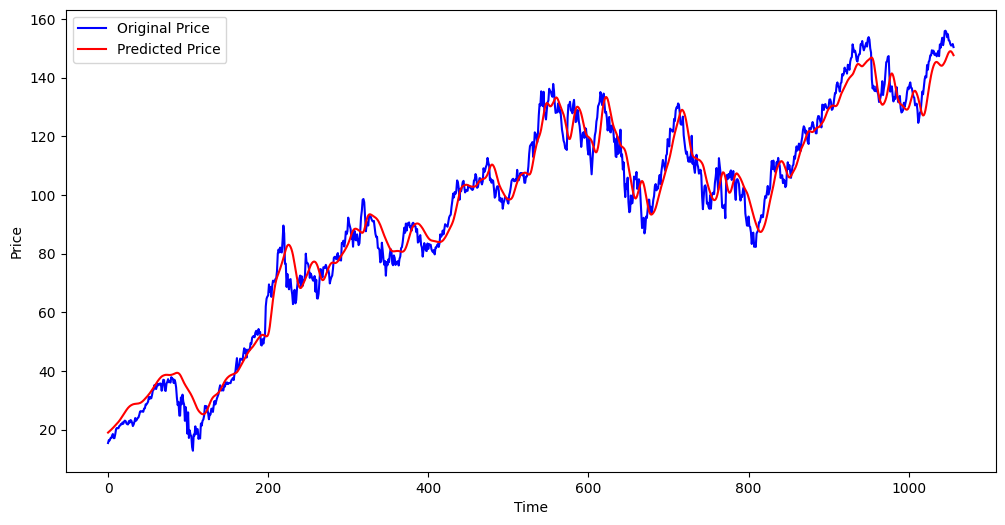

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()